In [6]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

matplotlib.style.use("https://gist.githubusercontent.com/JonnyCBB/c464d302fefce4722fe6cf5f461114ea/raw/64a78942d3f7b4b5054902f2cee84213eaff872f/matplotlibrc")

In [33]:
df = pd.read_csv("theta_k_lambda_table.csv")
df

,θ,k,λ
0,0.1,7,7.498942
1,0.1,3,273.841963
2,0.1,12,7.498942
3,0.1,5,191.095297
4,0.1,15,10.746078
...,...,...,...
445,0.9,14,64.938163
446,0.9,13,64.938163
447,0.9,11,93.057204
448,0.9,12,64.938163


/home/cokes/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cokes/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cokes/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cokes/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cokes/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 1

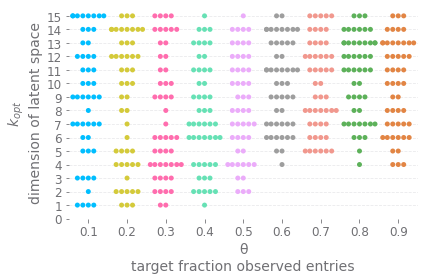

In [8]:
ax = sb.swarmplot(data=df, x="θ", y="k")
ax.set(yticks=[i for i in range(16)], xlabel="θ\nfraction observed entries", ylabel="$k_{opt}$\ndimension of latent space")
plt.tight_layout()
plt.savefig("beeswarm_k.pdf", format="pdf")

/home/cokes/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cokes/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cokes/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cokes/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/cokes/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning:

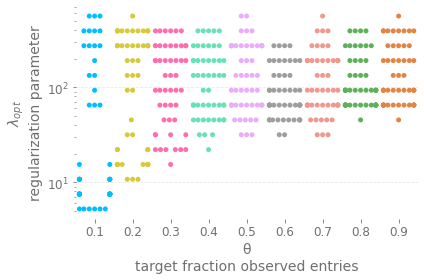

In [9]:
ax = sb.swarmplot(data=df, x="θ", y="λ")
ax.set(xlabel="θ\nfraction observed entries", ylabel="$\lambda_{opt}$\nregularization parameter")
ax.set_yscale("log")
plt.tight_layout()
plt.savefig("beeswarm_lambda.pdf", format="pdf")

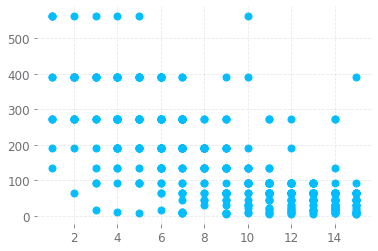

In [26]:
plt.figure()
plt.scatter(df.k.values, df.λ.values)

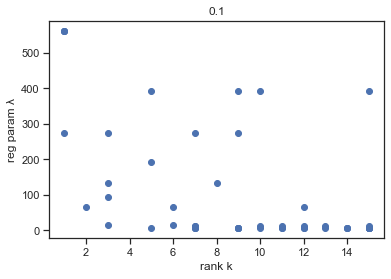

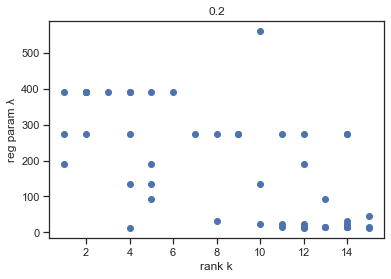

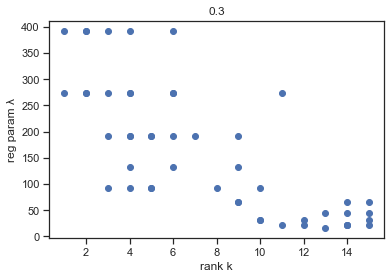

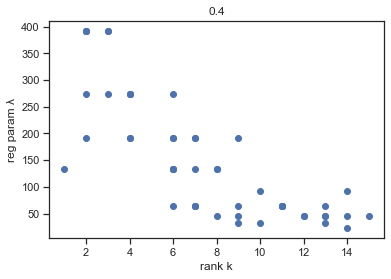

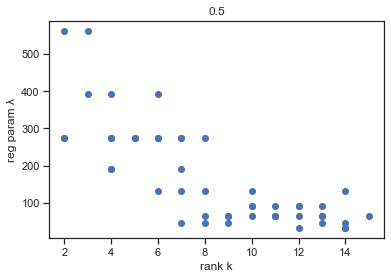

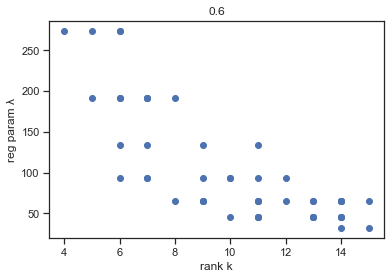

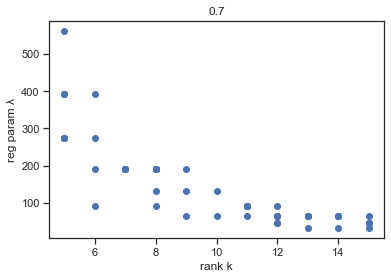

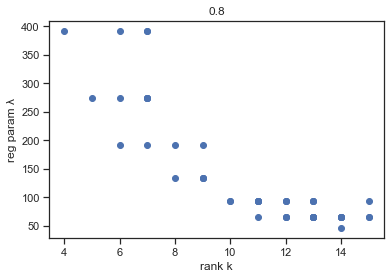

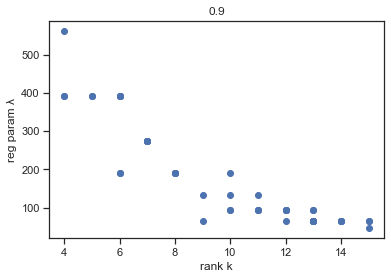

In [101]:
for θ, dfθ in df.groupby('θ'):
#     print(dfθ)
#     print(θ)
    plt.figure()
    plt.scatter(dfθ.k.values, dfθ.λ.values)
    plt.xlabel("rank k")
    plt.ylabel("reg param λ")
    plt.title(θ)
    plt.show()

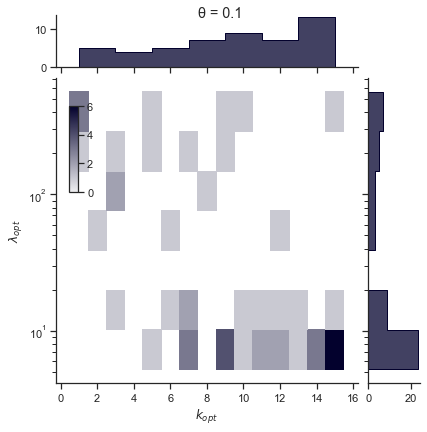

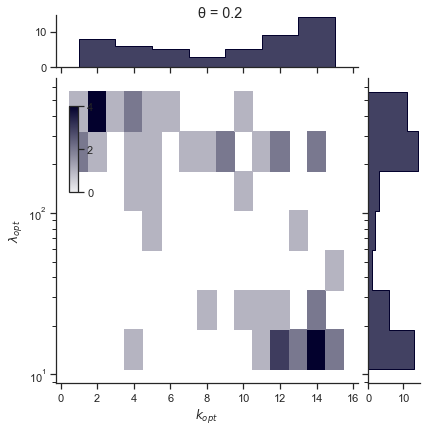

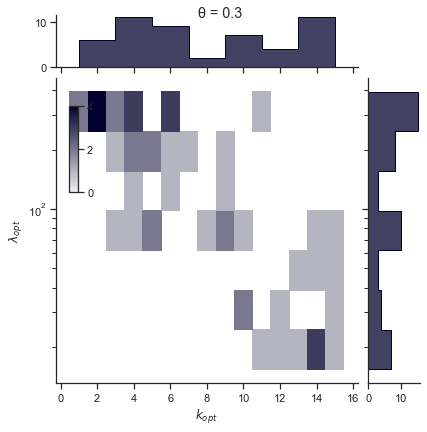

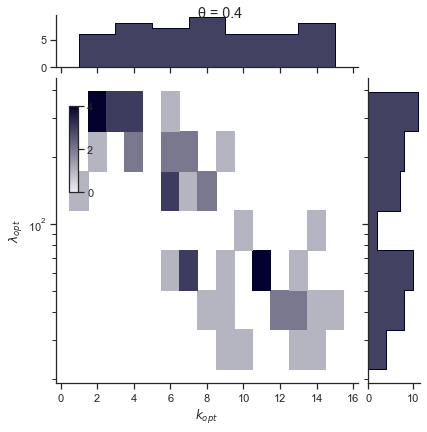

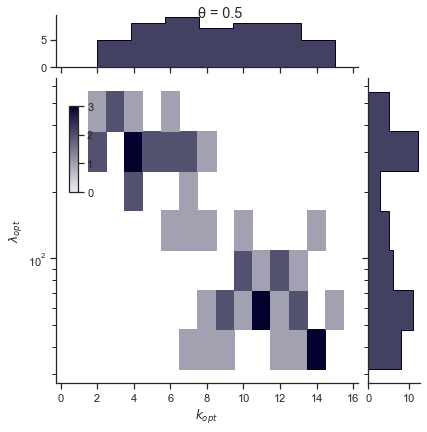

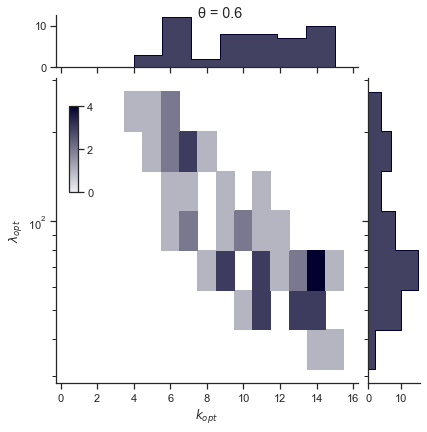

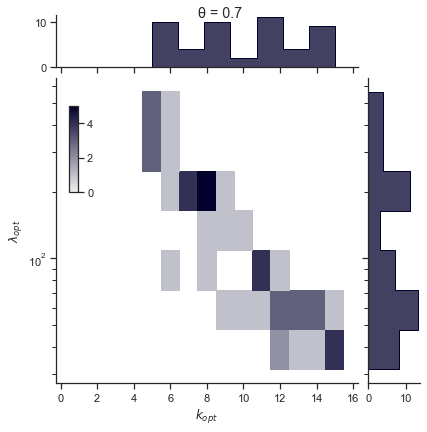

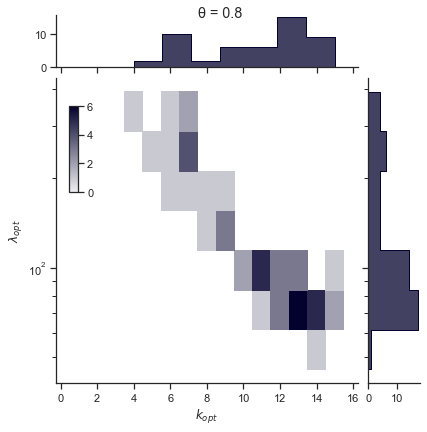

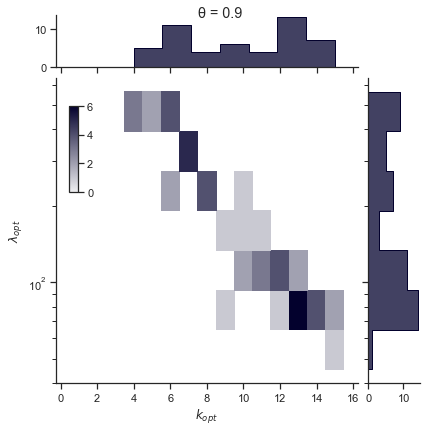

In [114]:
sb.set_theme(style="ticks")

# Load the planets dataset and initialize the figure
for θ, dfθ in df.groupby('θ'):
    g = sb.JointGrid(data=dfθ, x="k", y="λ", marginal_ticks=True)

    # Set a log scaling on the y axis
    g.ax_joint.set(yscale="log")

    # # Create an inset legend for the histogram colorbar
    cax = g.fig.add_axes([.15, .55, .02, .2])

    # # Add the joint and marginal histogram plots
    g.plot_joint(
        sb.histplot,# discrete=(True, True),
        bins=([i + 0.5 for i in range(16)], 'auto'),
        cmap="light:#03012d", cbar=True, cbar_ax=cax
    )
    g.ax_joint.set(ylabel="$\lambda_{opt}$", xlabel="$k_{opt}$")
    g.plot_marginals(sb.histplot, element="step", color="#03012d")
    g.fig.suptitle("θ = {}".format(θ))
    plt.savefig("hyper_params_theta" + "%d" % (θ*10) + ".pdf", format="pdf")

In [10]:
df_p = pd.read_csv("normalized_props.csv")
df_p.head()

,O$_2$\n298 K\n5 bar,O$_2$\n298 K\n140 bar,CO$_2$\n300 K\n0.001 bar,CO$_2$\n300 K\n30 bar,N$_2$\n300 K\n0.001 bar,N$_2$\n300 K\n30 bar,H$_2$\n77 K\n5 bar,H$_2$\n77 K\n100 bar,H$_2$\n298 K\n5 bar,H$_2$\n298 K\n100 bar,H$_2$O Henry\n300 K,H$_2$S Henry\n300 K,Xe Henry\n300 K,Kr Henry\n300 K,CH$_4$\n298 K\n65 bar,CH$_4$\n298 K\n5.8 bar
0,0.782594,0.227099,1.514963,0.787295,0.928027,0.615974,0.515799,0.183054,0.179256,0.138072,0.643544,2.000030,0.862103,1.338224,0.238057,0.413698
1,-0.345834,-0.137501,-0.262078,-0.403770,-0.468471,-0.347206,-0.252140,-0.134338,-0.169558,-0.135878,-0.553239,-0.194798,0.065301,-0.099299,-0.120977,-0.205089
2,-1.477719,-1.098644,-0.164477,-1.082238,-1.219344,-1.366190,-1.734618,-1.017157,-1.048633,-0.981814,1.686481,0.574774,-0.391555,-1.120223,-1.203811,-1.566760
3,-0.098704,0.013381,-0.039805,0.207683,0.413187,0.309000,0.003914,-0.022077,0.026384,0.016189,0.671730,0.220817,0.062908,0.008153,0.001658,0.116946
4,1.701469,1.390657,-0.045194,2.019726,3.211449,2.342041,3.608981,1.193219,1.001780,0.873118,-0.139798,-0.114153,-0.076071,0.507465,1.774058,2.289785


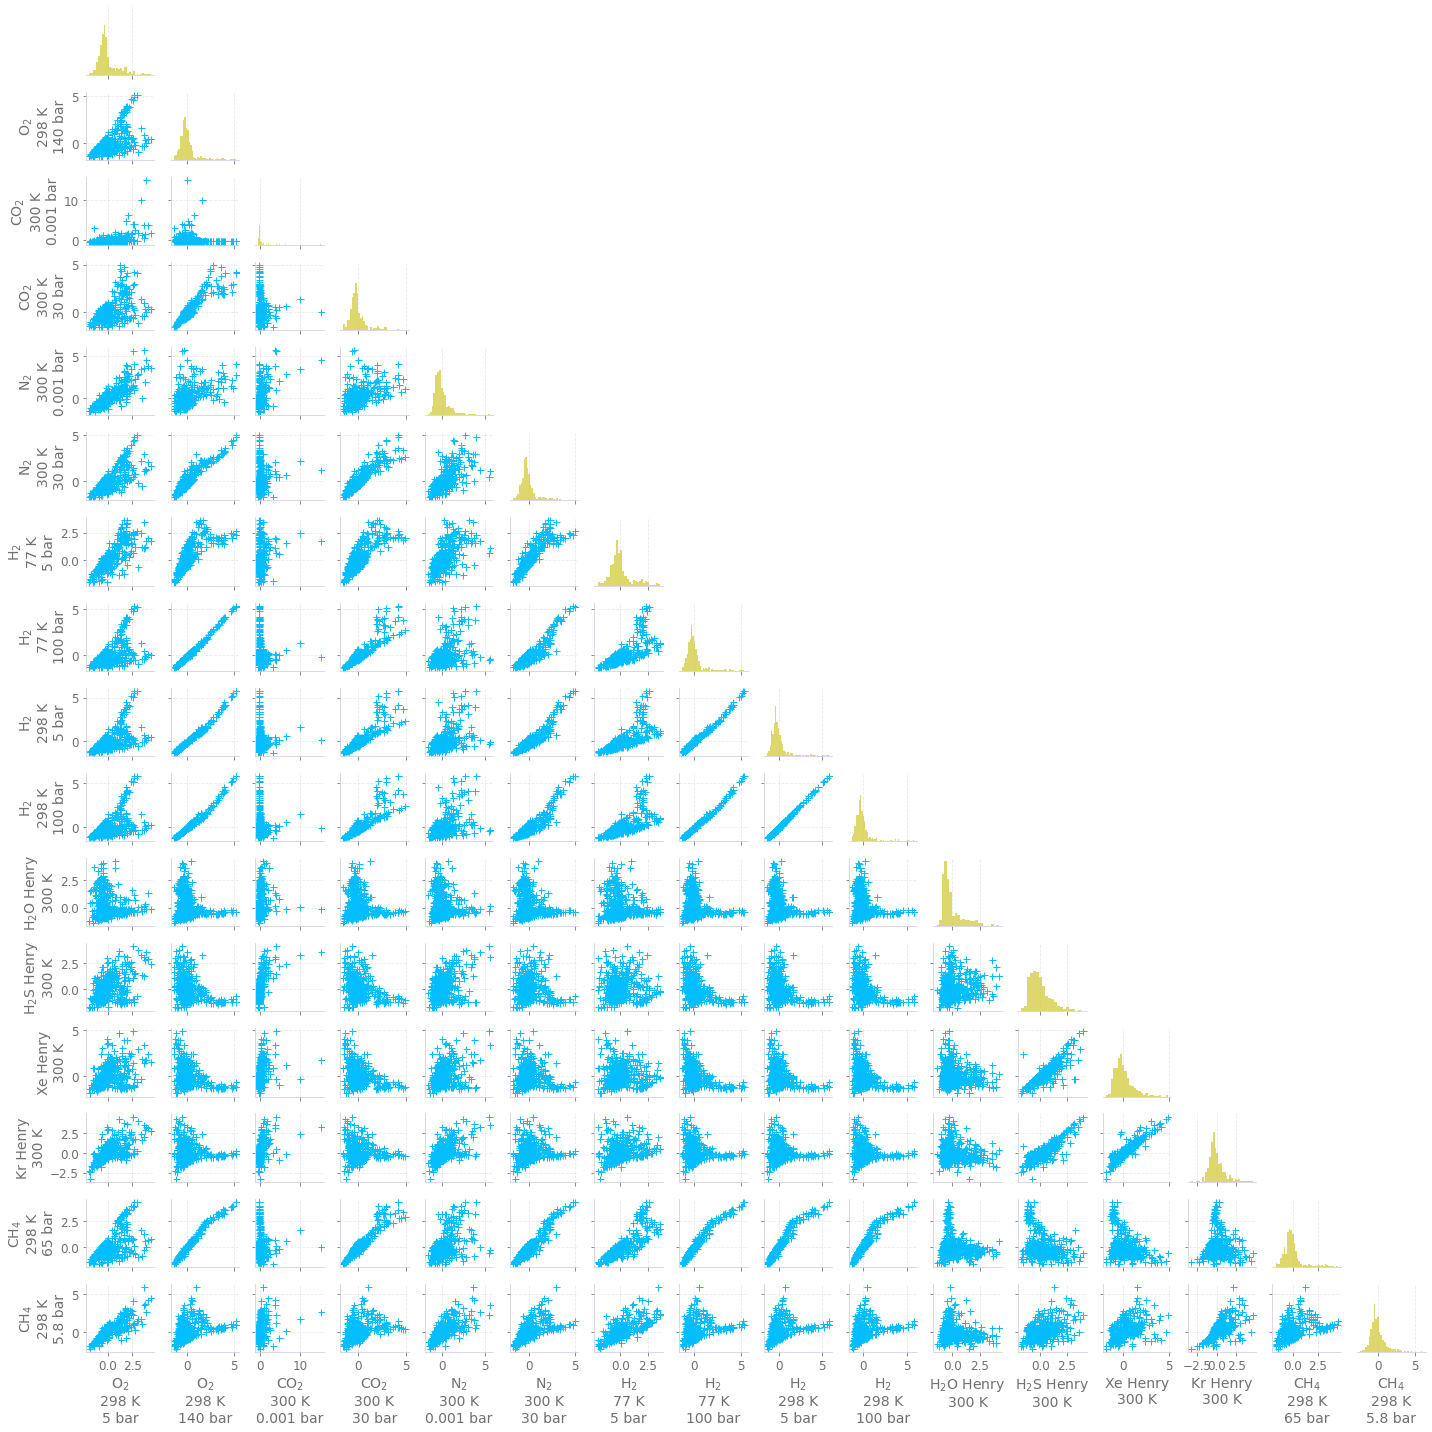

In [7]:
g = sb.pairplot(df_p, corner=True,
                plot_kws=dict(marker="+", linewidth=1),
                diag_kws=dict(fill=True, color="C1", ec="None")
               )
g.fig.set_size_inches(20, 20)
plt.tight_layout()
plt.savefig("scatterplot_matrix.png", dpi=300, format="png")

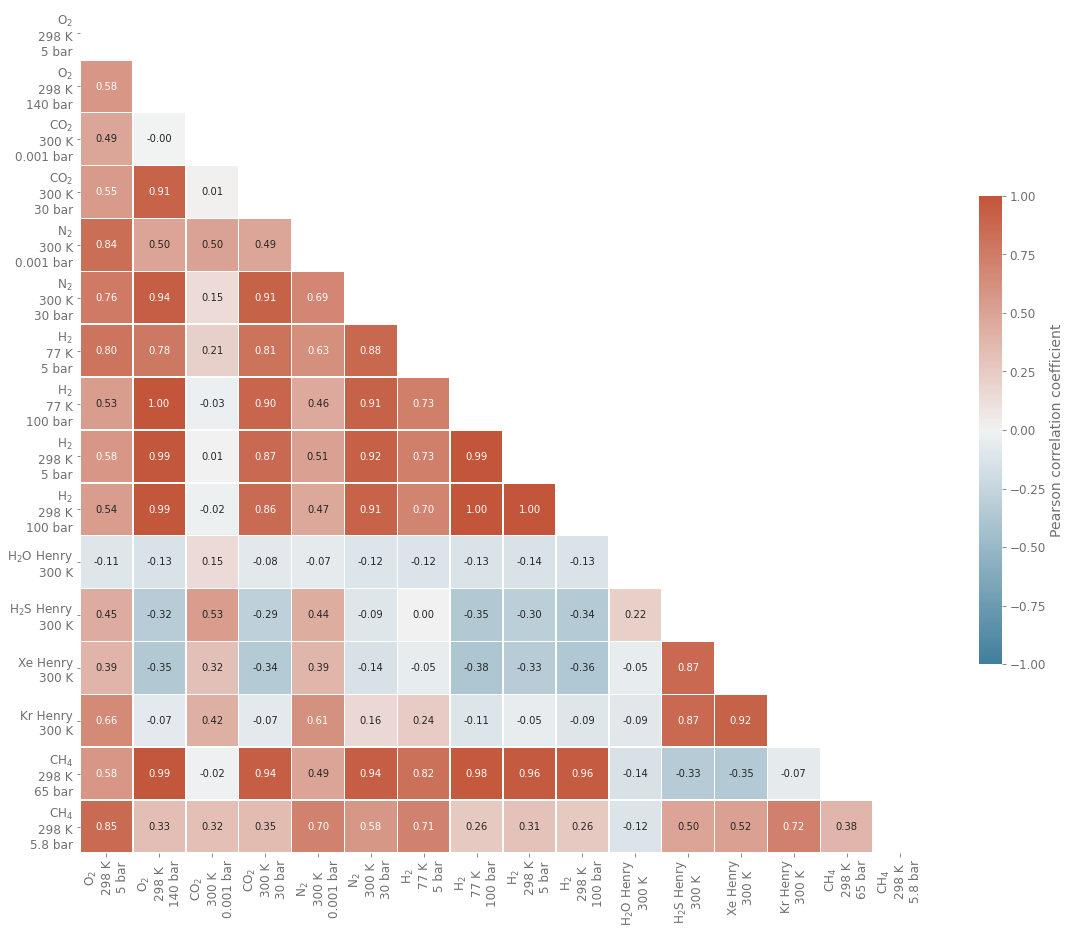

In [14]:
# Compute the correlation matrix
corr = df_p.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 14))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, center=0, vmax=1.0, vmin=-1.0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5, 'label':'Pearson correlation coefficient'}, annot=True, fmt=".2f")

plt.tight_layout()
plt.savefig('corr_matrix.pdf', format='pdf')